In [ ]:
!pip install pgmpy
!pip install bnlearn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 7.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 49 kB 3.6 MB/s 
     |████████████████████████████████| 216 kB 14.7 MB/s 
     |████████████████████████████████| 48 kB 5.0 MB/s 
     |████████████████████████████████| 48 kB 4.3 MB/s 
     |████████████████████████████████| 47 kB 5.0 MB/s 
     |████████████████████████████████| 47 kB 4.9 MB/s 
     |████████████████████████████████| 47 kB 4.7 MB/s 
     |████████████████████████████████| 47 kB 5.0 MB/s 
     |████████████████████████████████| 47 kB 4.3 MB/s 
     |████████████████████████████████| 46 kB 4.5 MB/s 
     |████████████████████████████████| 46 kB 4.1 MB/s 
     |████████████████████████████████| 11.2 MB 31.8 MB/s 
     |████████████████████████████████| 748 kB 48.6 MB/s 
     |████

In [ ]:
pip uninstall matplotlib

Found existing installation: matplotlib 3.5.3
Uninstalling matplotlib-3.5.3:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.3-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.3.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.5.3


In [ ]:
pip install matplotlib==3.3.4

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import bnlearn as bn
import torch
import numpy as np
from pgmpy.models import BayesianModel
from pgmpy.estimators import PC, HillClimbSearch
from pgmpy.estimators import MaximumLikelihoodEstimator, ExhaustiveSearch, BicScore , BDeuScore, K2Score
from pgmpy.estimators import BdeuScore, K2Score, BicScore
from pgmpy.inference import VariableElimination
import matplotlib.pyplot as plt
import networkx as nx
from pgmpy.metrics import log_likelihood_score,structure_score
from pgmpy.independencies import Independencies

In [ ]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("running on the GPU")
else:
    device = torch.device("cpu")
    print("running on the CPU")



running on the GPU


In [ ]:
title = "gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke"

title = title.split(",")

data_train = pd.read_csv(r"/content/drive/MyDrive/AAI docs/stroke-data-discretized-train.csv", names=title)
data_test = pd.read_csv(r"/content/drive/MyDrive/AAI docs/stroke-data-discretized-test.csv", names=title)

data_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,Male,4,0,1,Yes,Private,Urban,4,1,formerly smoked,1
2,Female,3,0,0,Yes,Self-employed,Rural,3,1,never smoked,1
3,Male,4,0,1,Yes,Private,Rural,1,1,never smoked,1
4,Female,2,0,0,Yes,Private,Urban,2,1,smokes,1


In [ ]:
model = BayesianModel([('stroke','smoking_status'),('stroke','age'), ('stroke','avg_glucose_level'),
                       ('age','smoking_status'),('age','bmi'),('age','ever_married'),('age','avg_glucose_level'),
                       ('avg_glucose_level','smoking_status'),
                       ('Residence_type','smoking_status'),
                       ('ever_married','smoking_status'),
                       ('work_type','hypertension'),('work_type','age'),('work_type','smoking_status'),
                       ('hypertension','stroke'),('hypertension','age'),('hypertension','avg_glucose_level'),('hypertension','bmi'),('hypertension','smoking_status'),
                       ('gender','smoking_status'), ('gender','avg_glucose_level'),
                       ('heart_disease','gender'),('heart_disease','stroke'), ('heart_disease','age'), ('heart_disease','avg_glucose_level'),('heart_disease','Residence_type')])





In [ ]:
model.fit(data_train, estimator=MaximumLikelihoodEstimator)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

In [ ]:
nx.draw(model, with_labels=True)
plt.show()

In [ ]:
bic = BicScore(data_train)
bdeu = BDeuScore(data_train, equivalent_sample_size=5)
k2 = K2Score(data_train)

In [ ]:
model.nodes()
model.get_independencies()

In [ ]:
print(log_likelihood_score(model, data_train))
print(structure_score(model, data_train, scoring_method="bic"))

-30620.09325503201
-1214254.337762864


In [ ]:
model.edges()

OutEdgeView([('stroke', 'smoking_status'), ('stroke', 'age'), ('stroke', 'avg_glucose_level'), ('age', 'smoking_status'), ('age', 'bmi'), ('age', 'ever_married'), ('age', 'avg_glucose_level'), ('avg_glucose_level', 'smoking_status'), ('ever_married', 'smoking_status'), ('Residence_type', 'smoking_status'), ('work_type', 'hypertension'), ('work_type', 'age'), ('work_type', 'smoking_status'), ('hypertension', 'stroke'), ('hypertension', 'age'), ('hypertension', 'avg_glucose_level'), ('hypertension', 'bmi'), ('hypertension', 'smoking_status'), ('gender', 'smoking_status'), ('gender', 'avg_glucose_level'), ('heart_disease', 'gender'), ('heart_disease', 'stroke'), ('heart_disease', 'age'), ('heart_disease', 'avg_glucose_level'), ('heart_disease', 'Residence_type')])

In [ ]:
model.get_immoralities

In [ ]:
model.get_immoralities()

In [ ]:
model.fit(data_train)

In [ ]:
#print(model.get_cpds())

[<TabularCPD representing P(stroke:3 | heart_disease:3, hypertension:3) at 0x7f7cbd1f93d0>, <TabularCPD representing P(smoking_status:5 | Residence_type:3, age:6, avg_glucose_level:6, ever_married:3, gender:4, hypertension:3, stroke:3, work_type:6) at 0x7f7cbd8a2cd0>, <TabularCPD representing P(age:6 | heart_disease:3, hypertension:3, stroke:3, work_type:6) at 0x7f7cbd218c50>, <TabularCPD representing P(avg_glucose_level:6 | age:6, gender:4, heart_disease:3, hypertension:3, stroke:3) at 0x7f7cbd209dd0>, <TabularCPD representing P(bmi:6 | age:6, hypertension:3) at 0x7f7cb8484490>, <TabularCPD representing P(ever_married:3 | age:6) at 0x7f7cbd214f10>, <TabularCPD representing P(Residence_type:3 | heart_disease:3) at 0x7f7cbd8d9f10>, <TabularCPD representing P(work_type:6) at 0x7f7cbd210fd0>, <TabularCPD representing P(hypertension:3 | work_type:6) at 0x7f7cb8480d50>, <TabularCPD representing P(gender:4 | heart_disease:3) at 0x7f7cbd215ed0>, <TabularCPD representing P(heart_disease:3) at 

In [ ]:
est = PC(data_train)

In [ ]:
skel, seperating_sets = est.build_skeleton(significance_level=0.01)

  0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
print("Undirected edges: ", skel.edges())

Undirected edges:  [('gender', 'heart_disease'), ('gender', 'smoking_status'), ('age', 'hypertension'), ('age', 'heart_disease'), ('age', 'ever_married'), ('age', 'work_type'), ('age', 'avg_glucose_level'), ('age', 'bmi'), ('age', 'smoking_status'), ('age', 'stroke'), ('hypertension', 'avg_glucose_level'), ('hypertension', 'bmi'), ('work_type', 'smoking_status'), ('avg_glucose_level', 'bmi')]


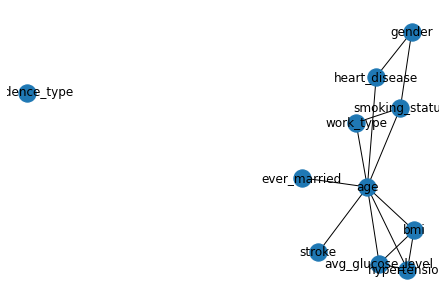

In [ ]:
nx.draw(skel, with_labels=True)
plt.show()

In [ ]:
pdag = est.skeleton_to_pdag(skel, seperating_sets)
print("PDAG edges:       ", pdag.edges())

PDAG edges:        [('work_type', 'smoking_status'), ('work_type', 'age'), ('heart_disease', 'gender'), ('heart_disease', 'age'), ('age', 'smoking_status'), ('age', 'avg_glucose_level'), ('age', 'work_type'), ('age', 'ever_married'), ('age', 'heart_disease'), ('age', 'hypertension'), ('age', 'stroke'), ('age', 'bmi'), ('hypertension', 'age'), ('hypertension', 'avg_glucose_level'), ('hypertension', 'bmi'), ('stroke', 'age'), ('avg_glucose_level', 'bmi'), ('avg_glucose_level', 'age'), ('avg_glucose_level', 'hypertension'), ('ever_married', 'age'), ('bmi', 'age'), ('bmi', 'hypertension'), ('bmi', 'avg_glucose_level')]


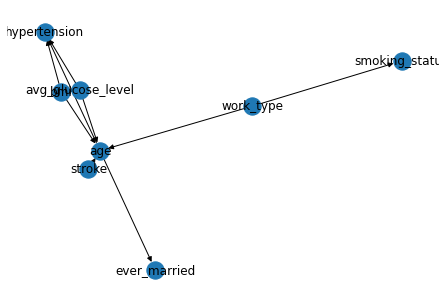

In [ ]:
nx.draw(pdag, with_labels=True)
plt.show()

In [ ]:
model = pdag.to_dag()
print("DAG edges:        ", model.edges())

DAG edges:         [('work_type', 'smoking_status'), ('heart_disease', 'gender'), ('age', 'smoking_status'), ('age', 'heart_disease'), ('age', 'work_type'), ('age', 'bmi'), ('age', 'avg_glucose_level'), ('age', 'hypertension'), ('age', 'stroke'), ('hypertension', 'bmi'), ('hypertension', 'avg_glucose_level'), ('avg_glucose_level', 'bmi'), ('ever_married', 'age')]


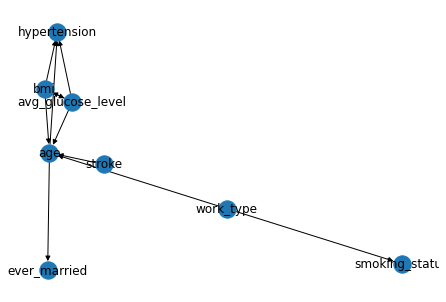

In [ ]:
nx.draw(pdag, with_labels=True)
plt.show()

In [ ]:
#model_pc=est.estimate(significance_level=0.01).edges()

  0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
model.edges()

OutEdgeView([('bmi', 'hypertension'), ('bmi', 'age'), ('avg_glucose_level', 'age'), ('avg_glucose_level', 'hypertension'), ('avg_glucose_level', 'bmi'), ('age', 'ever_married'), ('age', 'hypertension'), ('work_type', 'smoking_status'), ('work_type', 'age'), ('stroke', 'age')])

In [ ]:
#need to try
from pgmpy.estimators import MmhcEstimator
from pgmpy.estimators import BDeuScore

mmhc = MmhcEstimator(data_train)
skeleton = mmhc.mmpc()
print("Part 1) Skeleton: ", skeleton.edges())



In [ ]:
skeleton.edges()


EdgeView([('gender', 'bmi'), ('gender', 'work_type'), ('age', 'stroke'), ('age', 'smoking_status'), ('age', 'ever_married'), ('age', 'work_type'), ('age', 'Residence_type'), ('hypertension', 'bmi'), ('hypertension', 'avg_glucose_level'), ('heart_disease', 'avg_glucose_level'), ('ever_married', 'avg_glucose_level'), ('ever_married', 'smoking_status'), ('work_type', 'smoking_status'), ('work_type', 'avg_glucose_level'), ('work_type', 'stroke'), ('work_type', 'bmi'), ('Residence_type', 'bmi'), ('avg_glucose_level', 'smoking_status')])

In [ ]:
# use hill climb search to orient the edges:
hc = HillClimbSearch(data_train)
#model = hc.estimate(tabu_length=10, white_list=skeleton.to_directed().edges(), scoring_method=BDeuScore(data_train))
model = hc.estimate(tabu_length=10, white_list=model.edges(), scoring_method=BDeuScore(data_train))

  0%|          | 0/1000000 [00:00<?, ?it/s]

In [ ]:
model.edges()

OutEdgeView([('age', 'ever_married'), ('age', 'hypertension'), ('work_type', 'age'), ('work_type', 'smoking_status'), ('avg_glucose_level', 'bmi'), ('bmi', 'hypertension'), ('stroke', 'age')])

In [ ]:
from pgmpy.estimators import HillClimbSearch
hc = HillClimbSearch(data_train)
best_model = hc.estimate(scoring_method=BicScore(data_train))
print(best_model.edges())

  0%|          | 0/1000000 [00:00<?, ?it/s]

[('age', 'work_type'), ('age', 'ever_married'), ('age', 'bmi'), ('age', 'heart_disease'), ('age', 'stroke'), ('age', 'avg_glucose_level'), ('hypertension', 'age'), ('work_type', 'smoking_status')]


In [ ]:
print(best_model.edges())

[('age', 'work_type'), ('age', 'ever_married'), ('age', 'bmi'), ('age', 'heart_disease'), ('age', 'stroke'), ('age', 'avg_glucose_level'), ('hypertension', 'age'), ('work_type', 'smoking_status')]


In [ ]:
new_model = BayesianModel(best_model.edges())

In [ ]:
new_model.edges()

OutEdgeView([('age', 'work_type'), ('age', 'ever_married'), ('age', 'bmi'), ('age', 'heart_disease'), ('age', 'stroke'), ('age', 'avg_glucose_level'), ('work_type', 'smoking_status'), ('hypertension', 'age')])

In [ ]:
data_train_new = data_train.drop(['Residence_type','gender'], axis=1)

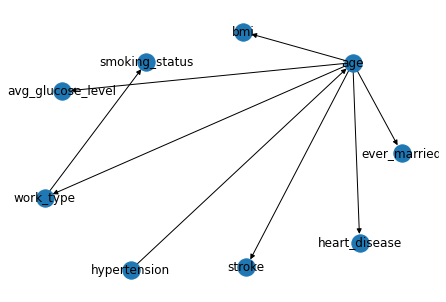

In [ ]:
nx.draw(new_model, with_labels=True)
plt.show()

In [ ]:
new_model.fit(data_train_new, estimator=MaximumLikelihoodEstimator)

In [ ]:
new_model.nodes()

NodeView(('age', 'work_type', 'ever_married', 'bmi', 'heart_disease', 'stroke', 'avg_glucose_level', 'hypertension', 'smoking_status'))

In [ ]:
data_train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
print(log_likelihood_score(new_model, data_train_new))
print(structure_score(new_model, data_train_new, scoring_method="bic"))

-26046.58760075108
-26742.254943725697


In [ ]:
data_test_copy = data_test.drop(['Residence_type','gender'], axis=1)


In [ ]:
data_test_copy.drop('stroke', axis=1, inplace=True)

In [ ]:
data_test_copy.head()

,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status
0,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status
1,4,0,0,No,Private,0,0,never smoked
2,3,0,0,Yes,Private,0,1,Unknown
3,4,0,0,Yes,Self-employed,4,0,never smoked
4,4,0,1,Yes,Self-employed,3,1,smokes


In [ ]:
new_model.nodes()

NodeView(('age', 'work_type', 'ever_married', 'bmi', 'heart_disease', 'stroke', 'avg_glucose_level', 'hypertension', 'smoking_status'))

In [ ]:
data_test_copy.columns

Index(['age', 'hypertension', 'heart_disease', 'ever_married', 'work_type',
       'avg_glucose_level', 'bmi', 'smoking_status'],
      dtype='object')

In [ ]:
Y_pred = new_model.predict(data_test_copy)

  0%|          | 0/410 [00:00<?, ?it/s]

In [ ]:
Y_prob = new_model.predict_probability(data_test_copy)

In [ ]:
Y_prob

In [ ]:
data_test = pd.read_csv(r"/content/drive/MyDrive/AAI docs/stroke-data-discretized-test.csv", names=title)

In [ ]:
Y_true=data_test['stroke']

In [ ]:
Y_prob_np = Y_prob.to_numpy()

In [ ]:
Y_prob_new = []
for i in range(1, len(Y_true)):
  true = int(Y_true[i])
  print(i,true)
  x = Y_prob_np[i][true]
  Y_prob_new.append(x)


In [ ]:
Y_true_new = Y_true.iloc[1:]

In [ ]:
P = np.asarray(Y_true_new.shape)+0.00001 # constant to avoid NAN in KL divergence
Q = np.asarray(Y_prob)+0.00001

In [ ]:
P

array([960.00001])

In [ ]:
from sklearn import metrics
acc = metrics.balanced_accuracy_score(Y_true, Y_pred)
fpr, tpr, _ = metrics.roc_curve(Y_true_new, Y_prob_new, pos_label=1)
auc = metrics.auc(fpr, tpr)
brier = metrics.brier_score_loss(Y_true_new, Y_prob_new)
kl_div = np.sum(P*np.log(P/Q))

In [ ]:
print("PERFORMANCE:")
print("Balanced Accuracy="+str(acc))
print("Area Under Curve="+str(auc))
print("Brier Score="+str(brier))
print("KL Divergence="+str(kl_div))
#print("training Time="+str(self.training_time)+" secs.")
#print("Inference Time="+str(self.inference_time)+" secs.")